# Hackathon Work by Miles Johnson
## Key elements:
## - Who will C9 draft/ban 
## - Who should we consider banning 
## - Play style of C9 players and statistics
## - Obj priority: When do they go baron/dragon and what dragon is most important to them
## - Vision pattern

# 1. Player game stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
df = pd.read_csv(r"C:\Users\miles\Downloads\Hackathondata\pgs.csv")

In [3]:
df.columns

Index(['game_urn', 'player_urn', 'team_urn', 'region', 'game_start_datetime',
       'best_of', 'curr_game', 'player', 'team', 'champion', 'side', 'role',
       'opp_player_urn', 'opp_player', 'opp_team_urn', 'opp_team',
       'opp_champion', 'result', 'kills', 'deaths', 'assists', 'double_kills',
       'triple_kills', 'quad_kills', 'penta_kills', 'first_blood',
       'avg_mins_between_kills', 'avg_mins_between_deaths', 'solo_kills',
       'iso_deaths', 'minion_kills', 'neutral_minion_kills',
       'neutral_minion_kills_team_jungle', 'neutral_minion_kills_enemy_jungle',
       'perc_in_mid_lane', 'num_recalls', 'total_damage_teamfights',
       'avg_damage_per_teamfight', 'dmg_to_champs_per_min',
       'dmg_shielded_on_team_per_min', 'dmg_healed_on_team_per_min',
       'total_gold', 'gold_at_15m', 'gold_diff_at_15m', 'wards_placed',
       'wards_killed', 'vision_score', 'jungle_prox', 'duo_prox', 'team_perid',
       'player_perid', 'opp_player_perid', 'opp_team_urn_perid', 'u

In [4]:
# Dropping columns that are all null, columns we were told not to worry about, and useless columns
columns = ['total_damage_teamfights', 'avg_damage_per_teamfight', 'jungle_prox', 'duo_prox', 'player_urn', 'team_urn', 
          'opp_player_urn', 'opp_team_urn', 'team_perid', 'player_perid', 'opp_player_perid', 'opp_team_urn_perid', 'gold_at_20m', 'gold_diff_at_20m',
          'upsert_at', 'avg_mins_between_kills', 'avg_mins_between_deaths', 'curr_game', 'region']

In [5]:
df = df.drop(columns, axis=1)

In [6]:
#Changing column to date time
df['game_start_datetime'] = pd.to_datetime(df['game_start_datetime'])

In [7]:
df.head(10)

,game_urn,game_start_datetime,best_of,player,team,champion,side,role,opp_player,opp_team,...,num_recalls,dmg_to_champs_per_min,dmg_shielded_on_team_per_min,dmg_healed_on_team_per_min,total_gold,gold_at_15m,gold_diff_at_15m,wards_placed,wards_killed,vision_score
0,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,huhi,GG,Nami,red,sup,Zven,C9,...,7,167.484610,51.637771,211.041340,6292,4083,999,36,12,87.457497
1,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,Fudge,C9,KSante,blue,top,Licorice,GG,...,7,443.378770,21.861665,0.000000,10824,5663,89,14,2,28.866512
2,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,Blaber,C9,Kindred,blue,jng,River,GG,...,7,647.275385,0.000000,32.144410,11463,5839,1609,15,8,49.710510
3,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,EMENES,C9,Gragas,blue,mid,Gori,GG,...,6,402.587000,0.000000,0.000000,8651,4562,-456,10,2,20.074314
4,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,Berserker,C9,Zeri,blue,bot,Stixxay,GG,...,8,438.242773,0.000000,0.000000,12373,5058,-152,8,13,37.721340
5,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,Zven,C9,Milio,blue,sup,huhi,GG,...,10,94.114889,133.479365,152.425077,6249,3084,-999,36,10,76.175224
6,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,Licorice,GG,Ornn,red,top,Fudge,C9,...,3,389.942813,0.000000,57.656905,9023,5574,-89,13,2,25.825781
7,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,River,GG,Jax,red,jng,Blaber,C9,...,6,240.310565,0.000000,0.000000,8089,4230,-1609,13,4,35.940067
8,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,Gori,GG,Ahri,red,mid,EMENES,C9,...,9,495.941822,0.000000,0.000000,9823,5018,456,8,8,30.073744
9,live:lol:riot:map:esportstmnt01-3373466,2023-06-14 21:13:15.338000+00:00,1,Stixxay,GG,Lucian,red,bot,Berserker,C9,...,7,344.719409,0.000000,0.000000,9580,5210,152,14,6,33.776291


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   game_urn                           320 non-null    object             
 1   game_start_datetime                320 non-null    datetime64[ns, UTC]
 2   best_of                            320 non-null    int64              
 3   player                             320 non-null    object             
 4   team                               320 non-null    object             
 5   champion                           320 non-null    object             
 6   side                               320 non-null    object             
 7   role                               320 non-null    object             
 8   opp_player                         320 non-null    object             
 9   opp_team                           320 non-null    obj

In [9]:
pd.set_option('display.max_columns', None)
df.describe()

,best_of,result,kills,deaths,assists,double_kills,triple_kills,quad_kills,penta_kills,first_blood,solo_kills,iso_deaths,minion_kills,neutral_minion_kills,neutral_minion_kills_team_jungle,neutral_minion_kills_enemy_jungle,perc_in_mid_lane,num_recalls,dmg_to_champs_per_min,dmg_shielded_on_team_per_min,dmg_healed_on_team_per_min,total_gold,gold_at_15m,gold_diff_at_15m,wards_placed,wards_killed,vision_score
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,2.250000,0.500000,2.700000,2.700000,6.446875,0.31875,0.084375,0.006250,0.003125,0.10000,0.184375,0.525000,171.975000,38.405935,26.437193,3.123437,0.165420,9.65000,450.674254,17.133887,22.921617,11707.675000,5078.506250,0.000000,21.521875,9.618750,53.600890
std,1.856953,0.500783,2.386745,1.732232,3.929272,0.61202,0.300062,0.078933,0.055902,0.30047,0.441293,0.791412,126.204489,59.260464,41.608220,6.036912,0.126752,3.31842,256.396568,65.397847,48.994501,3724.427587,987.094756,848.144698,19.953068,6.052406,34.531319
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.007444,2.00000,45.127264,0.000000,0.000000,4287.000000,2845.000000,-2577.000000,4.000000,0.000000,9.344793
25%,1.000000,0.000000,1.000000,1.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.067010,7.00000,249.269984,0.000000,0.000000,8947.000000,4593.500000,-534.500000,10.000000,5.000000,30.291650
50%,1.000000,0.500000,2.000000,3.000000,6.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,213.500000,8.575000,5.000000,0.000000,0.108512,9.00000,434.819249,0.000000,0.000000,11478.500000,5209.500000,0.000000,14.000000,8.000000,43.133099
75%,5.000000,1.000000,4.000000,4.000000,8.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,273.500000,38.312494,26.049998,4.000000,0.251452,11.25000,622.184603,0.000000,17.723651,13954.250000,5761.000000,534.500000,21.000000,13.000000,64.203093
max,5.000000,1.000000,16.000000,8.000000,24.000000,4.00000,2.000000,1.000000,1.000000,1.00000,3.000000,5.000000,494.000000,223.199921,162.099976,46.699997,0.501983,21.00000,1581.386480,715.493125,282.156349,24293.000000,7544.000000,2577.000000,120.000000,32.000000,204.532959


In [10]:
# Dataframe of stats by team
team_stats = df.groupby('team').sum().reset_index()

C:\Users\miles\AppData\Local\Temp\ipykernel_22212\400467589.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_stats = df.groupby('team').sum().reset_index()


In [11]:
#zven stats
Zven_df = df[df['player']=='Zven']

In [12]:
Zven_df.describe()

,best_of,result,kills,deaths,assists,double_kills,triple_kills,quad_kills,penta_kills,first_blood,solo_kills,iso_deaths,minion_kills,neutral_minion_kills,neutral_minion_kills_team_jungle,neutral_minion_kills_enemy_jungle,perc_in_mid_lane,num_recalls,dmg_to_champs_per_min,dmg_shielded_on_team_per_min,dmg_healed_on_team_per_min,total_gold,gold_at_15m,gold_diff_at_15m,wards_placed,wards_killed,vision_score
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.0,18.0,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.333333,0.777778,0.611111,2.277778,10.555556,0.0,0.0,0.0,0.0,0.055556,0.0,0.166667,28.333333,0.444444,0.222222,0.222222,0.094327,10.111111,149.723359,59.486211,52.977533,7434.222222,3579.444444,241.611111,46.500000,12.166667,96.188500
std,1.940285,0.427793,0.777544,1.487420,4.245721,0.0,0.0,0.0,0.0,0.235702,0.0,0.383482,12.532311,1.885618,0.942809,0.942809,0.023863,2.826115,89.499090,75.103300,78.886892,1013.407563,425.869108,531.853710,19.796761,5.972978,35.116727
min,1.000000,0.000000,0.000000,0.000000,4.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.000000,0.065936,5.000000,64.298377,0.000000,0.000000,5480.000000,2845.000000,-999.000000,22.000000,3.000000,52.745422
25%,1.000000,1.000000,0.000000,1.000000,8.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,17.500000,0.000000,0.000000,0.000000,0.076402,8.000000,99.007413,0.000000,0.000000,6962.000000,3310.250000,-17.000000,33.750000,8.000000,71.066765
50%,1.000000,1.000000,0.000000,3.000000,10.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,32.500000,0.000000,0.000000,0.000000,0.089890,9.500000,124.346997,35.226817,11.750018,7231.500000,3529.000000,136.000000,40.000000,10.000000,83.615662
75%,5.000000,1.000000,1.000000,3.000000,12.750000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,37.500000,0.000000,0.000000,0.000000,0.102498,11.750000,169.520162,89.043997,72.693881,8264.000000,3921.000000,623.000000,54.500000,16.500000,120.725033
max,5.000000,1.000000,2.000000,5.000000,22.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,44.000000,8.000000,4.000000,4.000000,0.156051,16.000000,460.207450,209.777762,241.304797,9087.000000,4236.000000,1176.000000,100.000000,22.000000,178.724350


In [13]:
# Berserker stats
Berserker_df = df[df['player']=='Berserker']

In [14]:
Berserker_df.describe()

,best_of,result,kills,deaths,assists,double_kills,triple_kills,quad_kills,penta_kills,first_blood,solo_kills,iso_deaths,minion_kills,neutral_minion_kills,neutral_minion_kills_team_jungle,neutral_minion_kills_enemy_jungle,perc_in_mid_lane,num_recalls,dmg_to_champs_per_min,dmg_shielded_on_team_per_min,dmg_healed_on_team_per_min,total_gold,gold_at_15m,gold_diff_at_15m,wards_placed,wards_killed,vision_score
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.333333,0.777778,4.277778,1.055556,5.611111,0.944444,0.222222,0.0,0.0,0.055556,0.111111,0.111111,285.444444,15.291666,11.750000,1.472222,0.200438,9.277778,580.914768,0.0,0.0,14132.666667,5835.277778,218.500000,16.222222,9.722222,43.555124
std,1.940285,0.427793,2.396212,1.392088,2.973192,0.802366,0.548319,0.0,0.0,0.235702,0.323381,0.323381,59.544568,12.036613,11.848963,3.556899,0.055808,2.371536,273.049384,0.0,0.0,2952.611725,658.605551,949.668193,7.158340,4.750301,16.507968
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,178.000000,0.000000,0.000000,0.000000,0.123703,6.000000,220.154644,0.0,0.0,9320.000000,4892.000000,-1238.000000,8.000000,2.000000,18.555513
25%,1.000000,1.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,251.000000,9.000000,4.000000,0.000000,0.152224,8.000000,371.891733,0.0,0.0,12088.000000,5338.500000,-419.000000,12.250000,5.750000,32.986231
50%,1.000000,1.000000,5.000000,0.000000,5.500000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,282.000000,12.275000,9.250000,0.000000,0.197241,9.000000,488.364778,0.0,0.0,13833.000000,5847.000000,-122.000000,14.000000,9.000000,38.599539
75%,5.000000,1.000000,6.000000,2.000000,8.000000,1.750000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,313.000000,22.399999,18.000000,0.600000,0.243496,10.750000,755.410029,0.0,0.0,15638.000000,6064.750000,696.000000,18.500000,13.000000,59.646578
max,5.000000,1.000000,9.000000,4.000000,10.000000,2.000000,2.000000,0.0,0.0,1.000000,1.000000,1.000000,425.000000,51.999996,48.999996,14.499998,0.280557,14.000000,1158.062717,0.0,0.0,19984.000000,7544.000000,2544.000000,31.000000,19.000000,73.959732


In [15]:
#emenes stats
Emenes_df = df[df['player']=='EMENES']

In [16]:
Emenes_df.describe()

,best_of,result,kills,deaths,assists,double_kills,triple_kills,quad_kills,penta_kills,first_blood,solo_kills,iso_deaths,minion_kills,neutral_minion_kills,neutral_minion_kills_team_jungle,neutral_minion_kills_enemy_jungle,perc_in_mid_lane,num_recalls,dmg_to_champs_per_min,dmg_shielded_on_team_per_min,dmg_healed_on_team_per_min,total_gold,gold_at_15m,gold_diff_at_15m,wards_placed,wards_killed,vision_score
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.333333,0.777778,3.444444,2.222222,6.444444,0.611111,0.111111,0.0,0.0,0.111111,0.333333,1.000000,253.666667,13.436110,7.616666,3.333333,0.367391,10.000000,568.408447,7.975290,0.611109,13021.000000,5823.277778,200.722222,13.500000,8.611111,38.420855
std,1.940285,0.427793,2.254987,2.157219,2.727253,0.697802,0.323381,0.0,0.0,0.323381,0.485071,0.970143,54.848454,14.070335,9.013731,5.139237,0.067299,2.612189,199.742641,21.678971,1.908971,2529.341998,672.622069,1030.769034,6.185847,5.225941,16.711323
min,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,154.000000,0.000000,0.000000,0.000000,0.252179,6.000000,257.686821,0.000000,0.000000,8651.000000,4562.000000,-2025.000000,7.000000,2.000000,20.074314
25%,1.000000,1.000000,2.000000,0.250000,4.500000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,0.000000,0.335192,8.000000,435.056209,0.000000,0.000000,11471.000000,5564.750000,-217.750000,10.000000,5.000000,27.646809
50%,1.000000,1.000000,3.000000,1.500000,6.000000,0.500000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,242.500000,12.999998,3.250000,0.000000,0.363566,10.000000,565.446229,0.000000,0.000000,13196.000000,5747.000000,231.500000,12.000000,6.500000,30.587113
75%,5.000000,1.000000,5.000000,3.750000,7.750000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,2.000000,288.250000,23.250000,15.624998,5.875000,0.422725,11.000000,663.823086,0.000000,0.000000,14883.500000,6510.250000,737.250000,14.750000,12.750000,46.185275
max,5.000000,1.000000,8.000000,6.000000,13.000000,2.000000,1.000000,0.0,0.0,1.000000,1.000000,3.000000,369.000000,39.749996,26.199997,18.499998,0.472517,16.000000,1081.178793,86.093898,7.521547,17247.000000,6726.000000,2096.000000,34.000000,19.000000,85.843948


In [17]:
#Blaber stats
Blaber_df = df[df['player']=='Blaber']

In [18]:
Blaber_df.describe()

,best_of,result,kills,deaths,assists,double_kills,triple_kills,quad_kills,penta_kills,first_blood,solo_kills,iso_deaths,minion_kills,neutral_minion_kills,neutral_minion_kills_team_jungle,neutral_minion_kills_enemy_jungle,perc_in_mid_lane,num_recalls,dmg_to_champs_per_min,dmg_shielded_on_team_per_min,dmg_healed_on_team_per_min,total_gold,gold_at_15m,gold_diff_at_15m,wards_placed,wards_killed,vision_score
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.333333,0.777778,2.777778,2.555556,8.111111,0.166667,0.0,0.0,0.0,0.277778,0.111111,0.111111,27.888889,169.416639,115.272249,15.727777,0.066565,9.055556,456.627715,19.102270,79.642431,11412.611111,5370.444444,505.166667,10.055556,12.944444,50.186359
std,1.940285,0.427793,2.414553,2.092626,3.287926,0.383482,0.0,0.0,0.0,0.460889,0.323381,0.323381,13.710833,25.088266,22.089032,10.081012,0.025189,2.711028,255.556400,81.044069,80.724023,1605.502968,657.574619,909.919082,2.363254,5.945559,15.776992
min,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,8.000000,117.000031,69.000023,4.000000,0.026218,5.000000,194.620487,0.000000,0.000000,8016.000000,4604.000000,-800.000000,6.000000,7.000000,30.203270
25%,1.000000,1.000000,2.000000,1.000000,5.500000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,18.250000,157.274963,98.100023,8.525000,0.053564,7.000000,292.641376,0.000000,15.368093,10704.250000,4970.750000,-48.500000,8.250000,8.000000,38.164785
50%,1.000000,1.000000,2.000000,2.000000,8.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,26.000000,166.999969,116.900036,14.849999,0.063567,8.500000,337.372285,0.000000,62.307804,11277.000000,5166.000000,532.000000,10.000000,11.000000,46.384256
75%,5.000000,1.000000,3.750000,3.000000,10.000000,0.000000,0.0,0.0,0.0,0.750000,0.000000,0.000000,33.500000,184.049961,126.625044,18.875000,0.079939,10.000000,621.955880,0.000000,110.581504,12546.750000,5750.500000,878.500000,11.000000,17.500000,59.845245
max,5.000000,1.000000,11.000000,8.000000,13.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,54.000000,220.199921,162.099976,46.699997,0.130161,15.000000,1035.958716,343.840863,282.156349,14013.000000,7429.000000,2577.000000,15.000000,26.000000,82.018929


In [19]:
#Fudge stats
Fudge_df = df[df['player']=='Fudge']

In [20]:
Fudge_df.describe()

,best_of,result,kills,deaths,assists,double_kills,triple_kills,quad_kills,penta_kills,first_blood,solo_kills,iso_deaths,minion_kills,neutral_minion_kills,neutral_minion_kills_team_jungle,neutral_minion_kills_enemy_jungle,perc_in_mid_lane,num_recalls,dmg_to_champs_per_min,dmg_shielded_on_team_per_min,dmg_healed_on_team_per_min,total_gold,gold_at_15m,gold_diff_at_15m,wards_placed,wards_killed,vision_score
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.333333,0.777778,3.277778,2.388889,5.722222,0.500000,0.333333,0.0,0.0,0.0,0.166667,0.944444,236.388889,6.902778,2.733333,1.016667,0.051723,9.500000,540.967180,2.859161,0.0,12097.277778,5350.055556,-100.555556,13.666667,4.500000,32.167448
std,1.940285,0.427793,1.840894,1.914001,2.371536,0.514496,0.485071,0.0,0.0,0.0,0.383482,0.998365,33.095475,7.723940,3.701510,2.248987,0.023542,3.053445,149.859209,6.748842,0.0,1963.518115,424.074698,704.092426,2.589572,2.229482,8.241416
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,163.000000,0.000000,0.000000,0.000000,0.024098,6.000000,297.948127,0.000000,0.0,8259.000000,4311.000000,-1623.000000,10.000000,0.000000,14.676289
25%,1.000000,1.000000,2.000000,1.000000,4.250000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,218.500000,0.437500,0.000000,0.000000,0.034998,7.000000,444.859030,0.000000,0.0,10927.750000,5164.250000,-465.250000,12.000000,2.500000,27.551185
50%,1.000000,1.000000,3.000000,2.000000,5.500000,0.500000,0.000000,0.0,0.0,0.0,0.000000,1.000000,245.000000,4.400000,1.600000,0.000000,0.045970,8.500000,504.677170,0.000000,0.0,11638.500000,5346.500000,23.000000,13.000000,5.000000,29.710344
75%,5.000000,1.000000,4.750000,3.750000,7.750000,1.000000,1.000000,0.0,0.0,0.0,0.000000,2.000000,259.250000,9.499999,4.375000,0.000000,0.063607,11.750000,663.838275,0.000000,0.0,13378.500000,5644.250000,309.750000,16.000000,5.750000,36.322001
max,5.000000,1.000000,7.000000,7.000000,10.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,3.000000,279.000000,27.750000,14.500000,8.000000,0.097949,17.000000,848.727810,21.861665,0.0,16015.000000,6112.000000,845.000000,18.000000,9.000000,47.923580


# Visualizing team stats

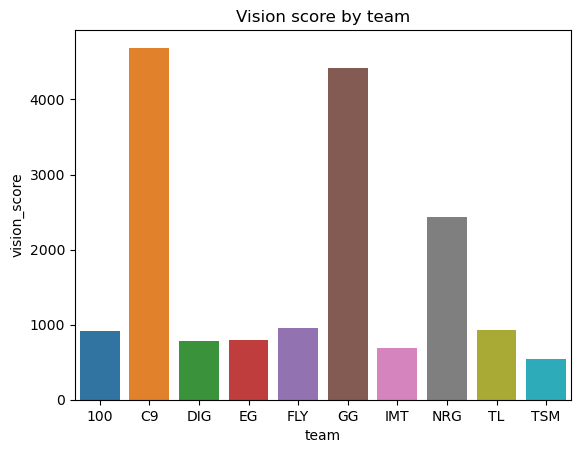

In [21]:
sns.barplot(data=team_stats, x='team', y='vision_score')
plt.title('Vision score by team')
plt.show()

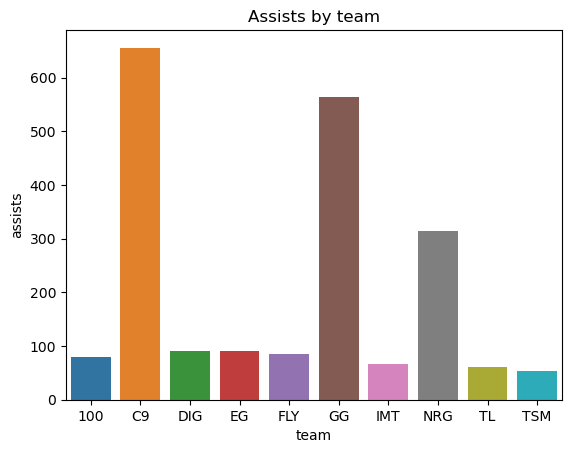

In [22]:
sns.barplot(data=team_stats, x='team', y='assists')
plt.title('Assists by team')
plt.show()

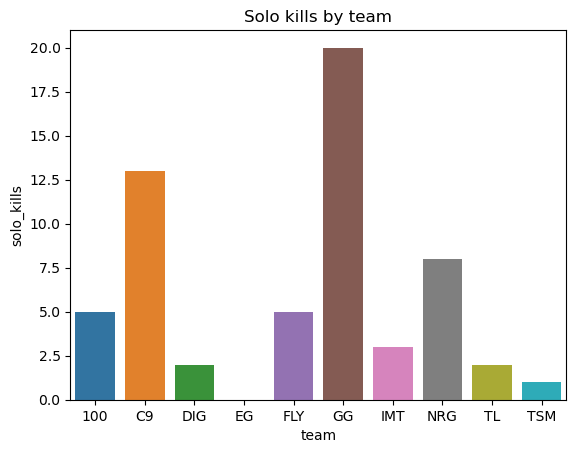

In [23]:
sns.barplot(data=team_stats, x='team', y='solo_kills')
plt.title('Solo kills by team')
plt.show()

# 2. Game summary dataset

In [24]:
df_gsum = pd.read_csv(r"C:\Users\miles\Downloads\Hackathondata\gamesummary.csv")

In [25]:
df_gsum.head(10)

,game_urn,match_perid,region,game_start_date_time,series_type,series_max,series_curr,team_1_urn,team_1_name,team_1_side,team_2_urn,team_2_name,team_2_side,winning_team_urn,winning_team,winning_side,game_duration_mins,bb1,rb1,bb2,rb2,bb3,rb3,bp1,rp1,rp2,bp2,bp3,rp3,rb4,bb4,rb5,bb5,rp4,bp4,bp5,rp5,team_1_perid,team_2_perid,winning_team_perid,upsert_at,team_1_top,team_1_top_pick_num,team_1_jng,team_1_jng_pick_num,team_1_mid,team_1_mid_pick_num,team_1_bot,team_1_bot_pick_num,team_1_sup,team_1_sup_pick_num,team_2_top,team_2_top_pick_num,team_2_jng,team_2_jng_pick_num,team_2_mid,team_2_mid_pick_num,team_2_bot,team_2_bot_pick_num,team_2_sup,team_2_sup_pick_num,game_version
0,live:lol:riot:map:esportstmnt01-3373466,esports:match:c8b9a529-2453-4789-8300-ae4173e4...,LCS,2023-06-14 21:13:15.338+00,BEST_OF,1,1,live:lol:riot:team:98767991877340524,C9,blue,live:lol:riot:team:99294153824386385,GG,red,live:lol:riot:team:98767991877340524,C9,blue,26.612867,Blitzcrank,Neeko,Vi,Draven,Khazix,Annie,Milio,Lucian,Ahri,Kindred,Zeri,Nami,Leblanc,MonkeyKing,Syndra,Poppy,Jax,Gragas,KSante,Ornn,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,2023-06-14 22:04:27.134728+00,KSante,9,Kindred,4,Gragas,8,Zeri,5,Milio,1,Ornn,10,Jax,7,Ahri,3,Lucian,2,Nami,6,13.11.512.8126
1,live:lol:riot:map:esportstmnt01-3378493,esports:match:dd465615-1183-4112-8cfa-c0fea0e1...,LCS,2023-06-16 21:50:32.179+00,BEST_OF,1,1,live:lol:riot:team:98926509892121852,FLY,blue,live:lol:riot:team:99294153824386385,GG,red,live:lol:riot:team:99294153824386385,GG,red,36.895633,Vi,Neeko,Milio,KSante,Lucian,Yuumi,Annie,Aphelios,Sejuani,Xayah,Rakan,Azir,MonkeyKing,Renekton,Kindred,Poppy,Lulu,Viego,Gragas,Yone,esports:team:87a6b274-b0b2-4184-b39c-52740a996f5b,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,2023-06-16 23:04:40.858307+00,Gragas,9,Viego,8,Annie,1,Xayah,4,Rakan,5,Yone,10,Sejuani,3,Azir,6,Aphelios,2,Lulu,7,13.11.512.8126
2,live:lol:riot:map:esportstmnt01-3376646,esports:match:2c80d6ab-803e-4967-85fd-48370ffa...,LCS,2023-06-17 00:49:39.089+00,BEST_OF,1,1,live:lol:riot:team:98767991877340524,C9,blue,live:lol:riot:team:98767991860392497,TSM,red,live:lol:riot:team:98767991877340524,C9,blue,29.410983,Blitzcrank,Zeri,Vi,Neeko,Lucian,Maokai,Milio,Karma,MonkeyKing,Aphelios,Kindred,Malphite,Gwen,Rakan,Sylas,Ezreal,Jhin,Gragas,KSante,Ahri,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:team:c7fb2ef8-27bf-4363-b1a5-b68f11ec272e,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,2023-06-17 02:04:38.463946+00,Gragas,8,Kindred,5,KSante,9,Aphelios,4,Milio,1,Malphite,6,MonkeyKing,3,Ahri,10,Jhin,7,Karma,2,13.11.512.8126
3,live:lol:riot:map:esportstmnt02-3208561,esports:match:3ccd76f5-ed33-42f5-a2ec-2dfd7cab...,LCS,2023-06-21 21:07:39.285+00,BEST_OF,1,1,live:lol:riot:team:98926509883054987,DIG,blue,live:lol:riot:team:99294153824386385,GG,red,live:lol:riot:team:99294153824386385,GG,red,33.146850,Jayce,Neeko,Aphelios,Leblanc,Vi,Sejuani,Azir,Varus,Akali,Maokai,Ashe,Kindred,KSante,Sion,Thresh,Blitzcrank,Jax,Poppy,Milio,Rell,esports:team:129cfc07-4f37-4f10-af3a-6f0d78c8a208,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,2023-06-21 23:04:33.755523+00,Poppy,8,Maokai,4,Azir,1,Ashe,5,Milio,9,Jax,7,Kindred,6,Akali,3,Varus,2,Rell,10,13.12.514.8523
4,live:lol:riot:map:esportstmnt02-3209643,esports:match:6ced2e69-e07e-4f3b-8112-4ca6ebdb...,LCS,2023-06-21 23:03:28.554+00,BEST_OF,1,1,live:lol:riot:team:98767991877340524,C9,blue,live:lol:riot:team:98926509892121852,FLY,red,live:lol:riot:team:98767991877340524,C9,blue,28.406850,Rakan,Kindred,Ivern,Leblanc,Annie,Varus,Neeko,Vi,Aphelios,Nocturne,Kennen,Azir,Ashe,Malphite,Lucian,Alistar,Renekton,Kaisa,Nautilus,Thresh,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:team:87a6b274-b0b2-4184-b39c-52740a996f5b,esports:team:c2be4c5e-e1e3-4c05-8098-914da282

In [26]:
# list of columns im removing
columns_2 = ['game_urn', 'match_perid', 'region', 'series_type', 'series_max', 'series_curr', 'team_1_urn', 'team_2_urn', 'winning_team_urn', 'team_1_perid',
            'team_2_perid', 'winning_team_perid', 'upsert_at', 'game_version']

In [27]:
df_gsum = df_gsum.drop(columns_2, axis=1)

In [28]:
# changing game start to datetime
df_gsum['game_start_date_time'] = pd.to_datetime(df_gsum['game_start_date_time'])

In [29]:
#setting game duration to int
df_gsum['game_duration_mins'] = df_gsum['game_duration_mins'].astype(int)

In [30]:
df_gsum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   game_start_date_time  32 non-null     datetime64[ns, UTC]
 1   team_1_name           32 non-null     object             
 2   team_1_side           32 non-null     object             
 3   team_2_name           32 non-null     object             
 4   team_2_side           32 non-null     object             
 5   winning_team          32 non-null     object             
 6   winning_side          32 non-null     object             
 7   game_duration_mins    32 non-null     int32              
 8   bb1                   32 non-null     object             
 9   rb1                   32 non-null     object             
 10  bb2                   32 non-null     object             
 11  rb2                   32 non-null     object             
 12  bb3       

In [31]:
# C9 pick dataset
C9_pick = df_gsum[df_gsum['team_1_name'] == 'C9']

In [32]:
#GG pick Dataset
GG_pick = df_gsum[df_gsum['team_2_name'] == 'GG']

In [33]:
C9_pick 

,game_start_date_time,team_1_name,team_1_side,team_2_name,team_2_side,winning_team,winning_side,game_duration_mins,bb1,rb1,bb2,rb2,bb3,rb3,bp1,rp1,rp2,bp2,bp3,rp3,rb4,bb4,rb5,bb5,rp4,bp4,bp5,rp5,team_1_top,team_1_top_pick_num,team_1_jng,team_1_jng_pick_num,team_1_mid,team_1_mid_pick_num,team_1_bot,team_1_bot_pick_num,team_1_sup,team_1_sup_pick_num,team_2_top,team_2_top_pick_num,team_2_jng,team_2_jng_pick_num,team_2_mid,team_2_mid_pick_num,team_2_bot,team_2_bot_pick_num,team_2_sup,team_2_sup_pick_num
0,2023-06-14 21:13:15.338000+00:00,C9,blue,GG,red,C9,blue,26,Blitzcrank,Neeko,Vi,Draven,Khazix,Annie,Milio,Lucian,Ahri,Kindred,Zeri,Nami,Leblanc,MonkeyKing,Syndra,Poppy,Jax,Gragas,KSante,Ornn,KSante,9,Kindred,4,Gragas,8,Zeri,5,Milio,1,Ornn,10,Jax,7,Ahri,3,Lucian,2,Nami,6
2,2023-06-17 00:49:39.089000+00:00,C9,blue,TSM,red,C9,blue,29,Blitzcrank,Zeri,Vi,Neeko,Lucian,Maokai,Milio,Karma,MonkeyKing,Aphelios,Kindred,Malphite,Gwen,Rakan,Sylas,Ezreal,Jhin,Gragas,KSante,Ahri,Gragas,8,Kindred,5,KSante,9,Aphelios,4,Milio,1,Malphite,6,MonkeyKing,3,Ahri,10,Jhin,7,Karma,2
4,2023-06-21 23:03:28.554000+00:00,C9,blue,FLY,red,C9,blue,28,Rakan,Kindred,Ivern,Leblanc,Annie,Varus,Neeko,Vi,Aphelios,Nocturne,Kennen,Azir,Ashe,Malphite,Lucian,Alistar,Renekton,Kaisa,Nautilus,Thresh,Kennen,5,Nocturne,4,Neeko,1,Kaisa,8,Nautilus,9,Renekton,7,Vi,2,Azir,6,Aphelios,3,Thresh,10
6,2023-06-24 00:56:04.593000+00:00,C9,blue,NRG,red,NRG,red,29,Sejuani,Neeko,Ivern,Leblanc,Rakan,Maokai,Vi,MonkeyKing,Rell,Kennen,Annie,Jayce,Varus,Ahri,Nautilus,Syndra,Azir,Aphelios,Yuumi,Kaisa,Kennen,4,Vi,1,Annie,5,Aphelios,8,Yuumi,9,Jayce,6,MonkeyKing,2,Azir,7,Kaisa,10,Rell,3
7,2023-06-29 01:22:45.634000+00:00,C9,blue,IMT,red,C9,blue,26,Kindred,Neeko,Xayah,Leblanc,Milio,Maokai,Kaisa,Viego,Ahri,Vi,Annie,Aphelios,Jax,Renekton,Rakan,Rumble,KSante,Rell,Gnar,Alistar,Gnar,9,Vi,4,Annie,5,Kaisa,1,Rell,8,KSante,7,Viego,2,Ahri,3,Aphelios,6,Alistar,10
10,2023-06-30 21:08:15.173000+00:00,C9,blue,EG,red,C9,blue,22,Blitzcrank,Maokai,Vi,Kennen,Leblanc,Neeko,Milio,Renekton,Sejuani,Kindred,KSante,Varus,Aphelios,Azir,Xayah,Tristana,Janna,Ahri,Ashe,Jayce,KSante,5,Kindred,4,Ahri,8,Ashe,9,Milio,1,Renekton,2,Sejuani,3,Jayce,10,Varus,6,Janna,7
14,2023-07-06 22:11:27.952000+00:00,C9,blue,DIG,red,C9,blue,30,Azir,Milio,Poppy,Kindred,Illaoi,Ivern,Tristana,Leblanc,Sejuani,Maokai,Renekton,Jax,Ashe,Rakan,Kaisa,Braum,Aphelios,Varus,Heimerdinger,Rell,Renekton,5,Maokai,4,Tristana,1,Varus,8,Heimerdinger,9,Jax,6,Sejuani,3,Leblanc,2,Aphelios,7,Rell,10
15,2023-07-12 23:37:41.942000+00:00,C9,blue,TL,red,TL,red,38,Rumble,Tristana,Blitzcrank,Jayce,Sejuani,Leblanc,Kindred,Aphelios,MonkeyKing,Milio,Ashe,Ziggs,Syndra,Rell,Annie,Nautilus,Rakan,Lissandra,Renekton,Kennen,Renekton,9,Kindred,1,Lissandra,8,Ashe,5,Milio,4,Kennen,10,MonkeyKing,3,Ziggs,6,Aphelios,2,Rakan,7
16,2023-07-14 00:04:47.225000+00:00,C9,blue,100,red,C9,blue,27,Azir,Tristana,Viego,Leblanc,Blitzcrank,Milio,Kaisa,Rell,Ahri,Maokai,Jayce,Varus,Renekton,Vi,Rakan,Braum,LeeSin,Rumble,Nautilus,Kennen,Rumble,8,Maokai,4,Jayce,5,Kaisa,1,Nautilus,9,Kennen,10,LeeSin,7,Ahri,3,Varus,6,Rell,2
18,2023-07-14 23:54:23.219000+00:00,C9,blue,EG,red,C9,blue,25,Blitzcrank,Milio,Ivern,Kaisa,Rumble,Leblanc,Tristana,Rell,Sejuani,Maokai,Renekton,Jax,Heimerdinger,Sylas,Xayah,Yone,Aphelios,KogMaw,Braum,Jayce,Renekton,5,Maokai,4,Tristana,1,KogMaw,8,Braum,9,Jax,6,Sejuani,3,Jayce,10,Aphelios,7,Rell,2


# C9 most picked champions

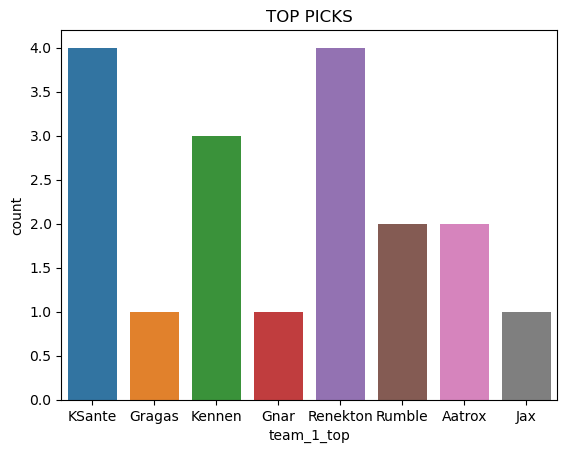

In [34]:
sns.countplot(data=C9_pick, x='team_1_top')
plt.title('TOP PICKS')
plt.show()

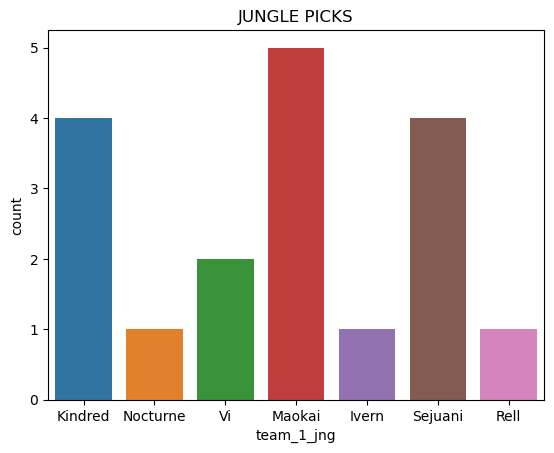

In [35]:
sns.countplot(data=C9_pick, x='team_1_jng')
plt.title('JUNGLE PICKS')
plt.show()

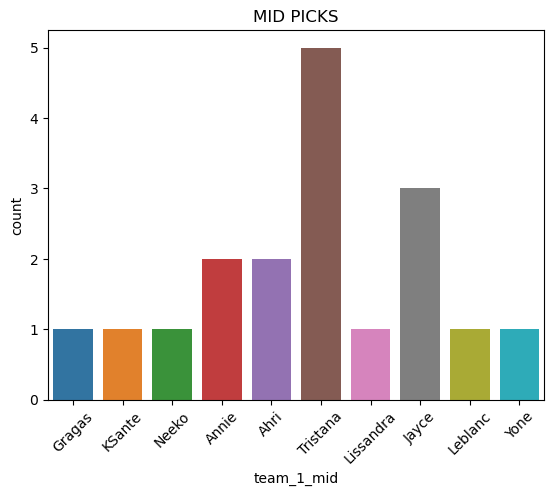

In [36]:
sns.countplot(data=C9_pick, x='team_1_mid')
plt.title('MID PICKS')
plt.xticks(rotation=45)
plt.show()

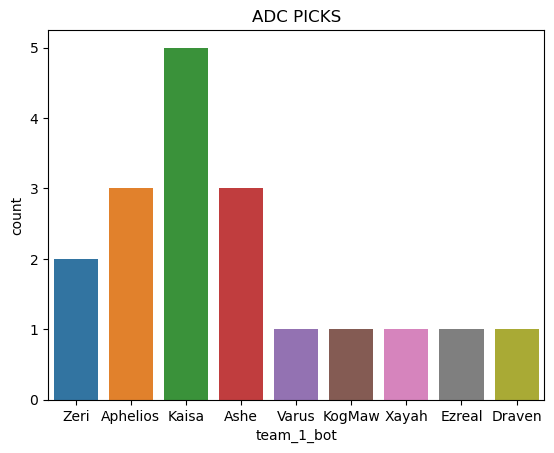

In [37]:
sns.countplot(data=C9_pick, x='team_1_bot')
plt.title('ADC PICKS')
plt.show()

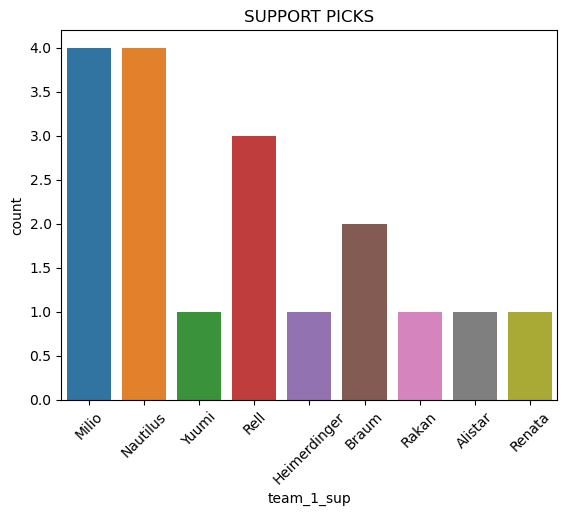

In [38]:
sns.countplot(data=C9_pick, x='team_1_sup')
plt.title('SUPPORT PICKS')
plt.xticks(rotation=45)
plt.show()

# C9 Most banned champions

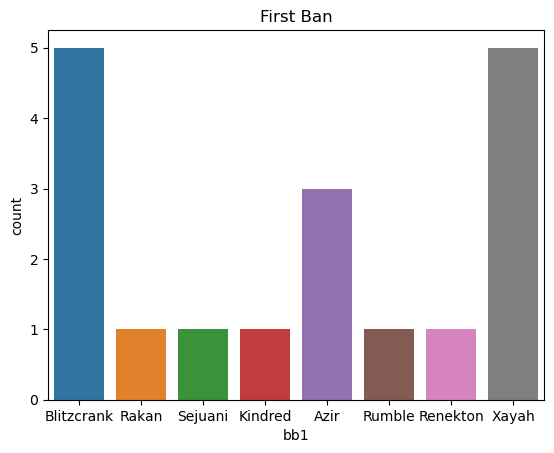

In [39]:
sns.countplot(data=C9_pick, x='bb1')
plt.title('First Ban')
plt.show()

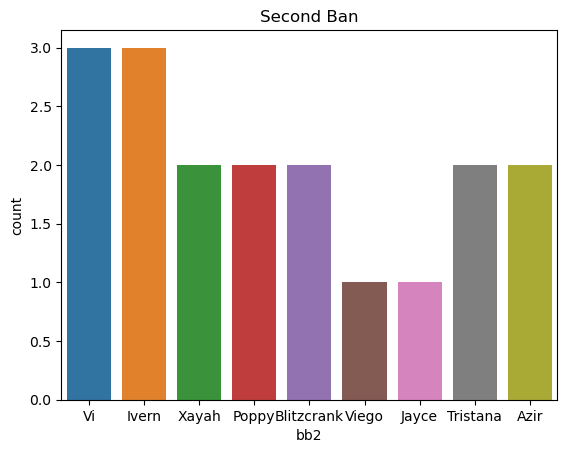

In [40]:
sns.countplot(data=C9_pick, x='bb2')
plt.title('Second Ban')
plt.show()

# First two bans seems to be their priorty bans considering the low range of champions

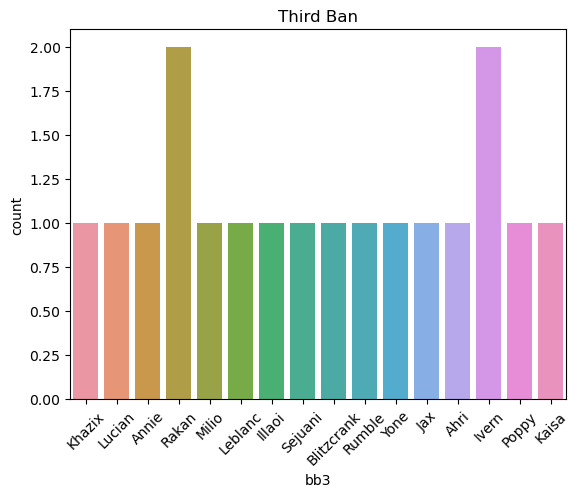

In [41]:
sns.countplot(data=C9_pick, x='bb3')
plt.title('Third Ban')
plt.xticks(rotation=45)
plt.show()

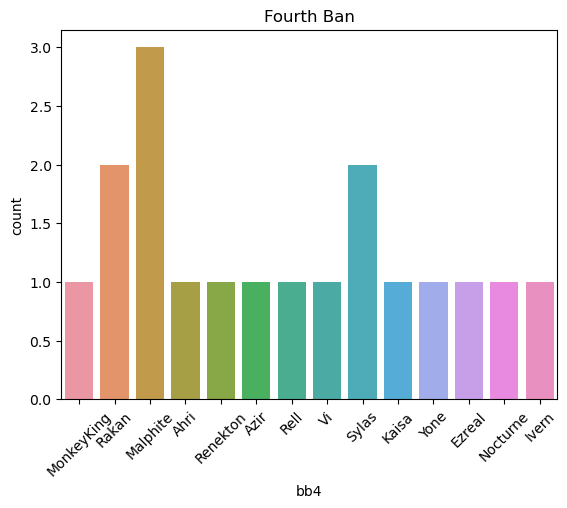

In [42]:
sns.countplot(data=C9_pick, x='bb4')
plt.title('Fourth Ban')
plt.xticks(rotation=45)
plt.show()

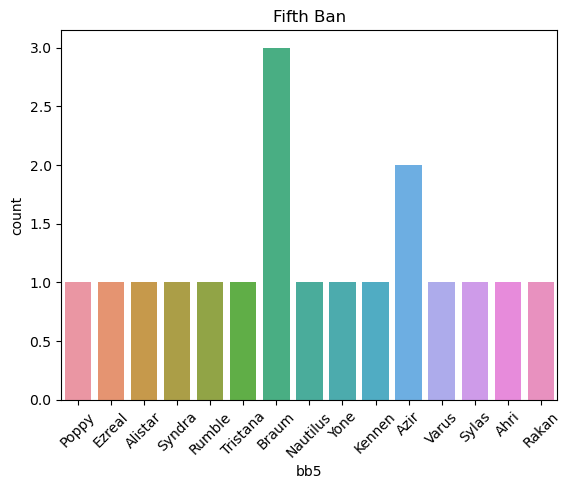

In [43]:
sns.countplot(data=C9_pick, x='bb5')
plt.title('Fifth Ban')
plt.xticks(rotation=45)
plt.show()

# GG most picked champions

In [44]:
GG_pick

,game_start_date_time,team_1_name,team_1_side,team_2_name,team_2_side,winning_team,winning_side,game_duration_mins,bb1,rb1,bb2,rb2,bb3,rb3,bp1,rp1,rp2,bp2,bp3,rp3,rb4,bb4,rb5,bb5,rp4,bp4,bp5,rp5,team_1_top,team_1_top_pick_num,team_1_jng,team_1_jng_pick_num,team_1_mid,team_1_mid_pick_num,team_1_bot,team_1_bot_pick_num,team_1_sup,team_1_sup_pick_num,team_2_top,team_2_top_pick_num,team_2_jng,team_2_jng_pick_num,team_2_mid,team_2_mid_pick_num,team_2_bot,team_2_bot_pick_num,team_2_sup,team_2_sup_pick_num
0,2023-06-14 21:13:15.338000+00:00,C9,blue,GG,red,C9,blue,26,Blitzcrank,Neeko,Vi,Draven,Khazix,Annie,Milio,Lucian,Ahri,Kindred,Zeri,Nami,Leblanc,MonkeyKing,Syndra,Poppy,Jax,Gragas,KSante,Ornn,KSante,9,Kindred,4,Gragas,8,Zeri,5,Milio,1,Ornn,10,Jax,7,Ahri,3,Lucian,2,Nami,6
1,2023-06-16 21:50:32.179000+00:00,FLY,blue,GG,red,GG,red,36,Vi,Neeko,Milio,KSante,Lucian,Yuumi,Annie,Aphelios,Sejuani,Xayah,Rakan,Azir,MonkeyKing,Renekton,Kindred,Poppy,Lulu,Viego,Gragas,Yone,Gragas,9,Viego,8,Annie,1,Xayah,4,Rakan,5,Yone,10,Sejuani,3,Azir,6,Aphelios,2,Lulu,7
3,2023-06-21 21:07:39.285000+00:00,DIG,blue,GG,red,GG,red,33,Jayce,Neeko,Aphelios,Leblanc,Vi,Sejuani,Azir,Varus,Akali,Maokai,Ashe,Kindred,KSante,Sion,Thresh,Blitzcrank,Jax,Poppy,Milio,Rell,Poppy,8,Maokai,4,Azir,1,Ashe,5,Milio,9,Jax,7,Kindred,6,Akali,3,Varus,2,Rell,10
5,2023-06-22 21:55:37.193000+00:00,IMT,blue,GG,red,GG,red,26,Lucian,Neeko,Vi,Leblanc,Azir,Kindred,Annie,Varus,Sejuani,MonkeyKing,Aphelios,Jayce,Milio,Jax,Sion,Yone,Renekton,Ornn,Rakan,Rell,Ornn,8,MonkeyKing,4,Annie,1,Aphelios,5,Rakan,9,Renekton,7,Sejuani,3,Jayce,6,Varus,2,Rell,10
8,2023-06-28 23:08:54.797000+00:00,NRG,blue,GG,red,NRG,blue,50,Kindred,Neeko,Milio,Leblanc,MonkeyKing,Vi,Kaisa,Maokai,Tristana,Renekton,Rell,Jax,Sejuani,Alistar,Poppy,Rakan,Nautilus,Ivern,Jayce,Azir,Renekton,4,Ivern,8,Jayce,9,Kaisa,1,Rell,5,Jax,6,Maokai,2,Azir,10,Tristana,3,Nautilus,7
9,2023-06-30 00:46:34.830000+00:00,100,blue,GG,red,GG,red,39,Tristana,Neeko,Vi,Leblanc,Kindred,KSante,Azir,Rakan,Sejuani,Maokai,Renekton,Yone,Kaisa,Jax,Jinx,Kennen,Aphelios,Xayah,Milio,Rumble,Renekton,5,Maokai,4,Azir,1,Xayah,8,Milio,9,Rumble,10,Sejuani,3,Yone,6,Aphelios,7,Rakan,2
11,2023-06-30 21:54:59.740000+00:00,TL,blue,GG,red,GG,red,33,Azir,Kennen,Tristana,Leblanc,Kindred,Neeko,Vi,Aphelios,Viego,Varus,Ahri,Annie,Jax,Rumble,Rakan,Renekton,Rell,Renata,KSante,Poppy,KSante,9,Vi,1,Ahri,5,Varus,4,Renata,8,Poppy,10,Viego,3,Annie,6,Aphelios,2,Rell,7
12,2023-07-08 01:10:01.581000+00:00,TSM,blue,GG,red,TSM,blue,27,Kindred,Rakan,Aphelios,Sejuani,Rumble,Leblanc,Tristana,Ashe,Poppy,Maokai,Renekton,Sylas,Kaisa,Milio,Karma,Rell,KSante,Jinx,Braum,Zac,Renekton,5,Maokai,4,Tristana,1,Jinx,8,Braum,9,KSante,7,Poppy,3,Sylas,6,Ashe,2,Zac,10
13,2023-07-06 21:09:37.478000+00:00,FLY,blue,GG,red,GG,red,35,Rumble,Rakan,Tristana,Ivern,Leblanc,Poppy,Sejuani,Aphelios,Kindred,Azir,Milio,Sylas,Ashe,Blitzcrank,Jinx,Kennen,Nautilus,Xayah,Renekton,KSante,Renekton,9,Sejuani,1,Azir,4,Xayah,8,Milio,5,KSante,10,Kindred,3,Sylas,6,Aphelios,2,Nautilus,7
17,2023-07-14 00:55:17.228000+00:00,IMT,blue,GG,red,GG,red,34,Jayce,Neeko,Leblanc,Kindred,Tristana,Kaisa,Poppy,Aphelios,Jax,Rell,Jinx,Maokai,Renekton,Yone,Milio,Alistar,Azir,Ziggs,Nautilus,Renata,Poppy,1,Nautilus,9,Ziggs,8,Jinx,5,Rell,4,Jax,3,Maokai,6,Azir,7,Aphelios,2,Renata,10


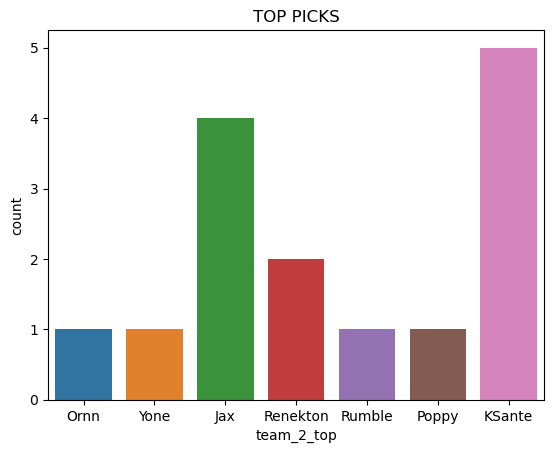

In [45]:
sns.countplot(data=GG_pick, x='team_2_top')
plt.title('TOP PICKS')
plt.show()

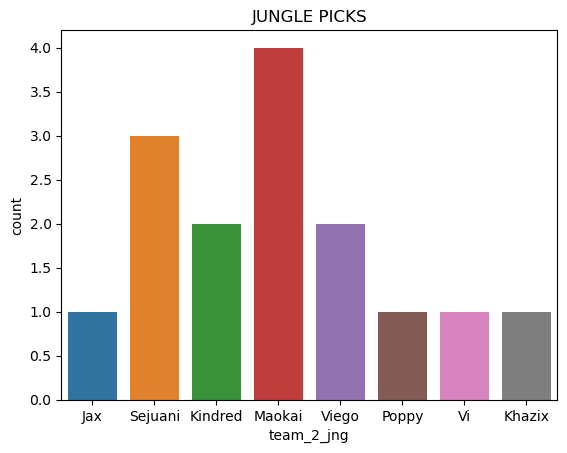

In [46]:
sns.countplot(data=GG_pick, x='team_2_jng')
plt.title('JUNGLE PICKS')
plt.show()

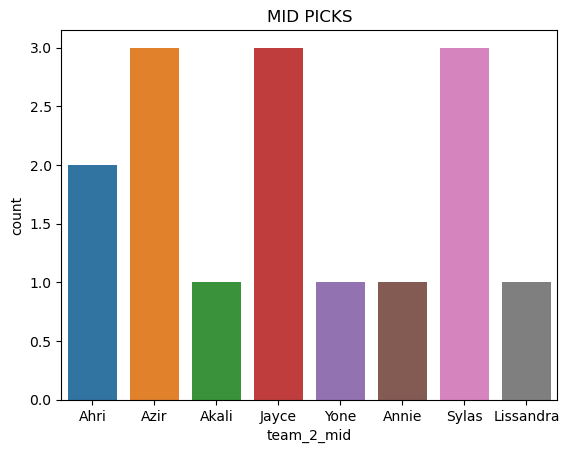

In [47]:
sns.countplot(data=GG_pick, x='team_2_mid')
plt.title('MID PICKS')
plt.show()

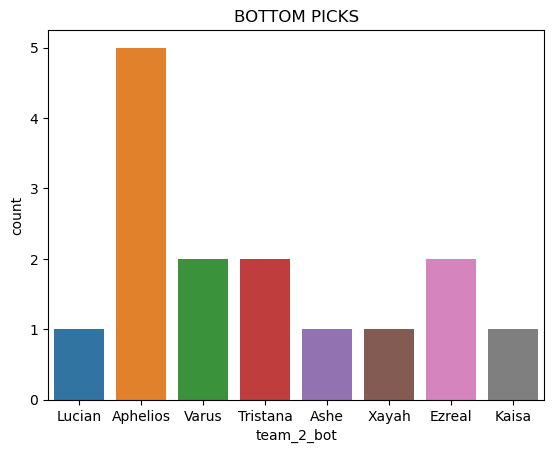

In [48]:
sns.countplot(data=GG_pick, x='team_2_bot')
plt.title('BOTTOM PICKS')
plt.show()

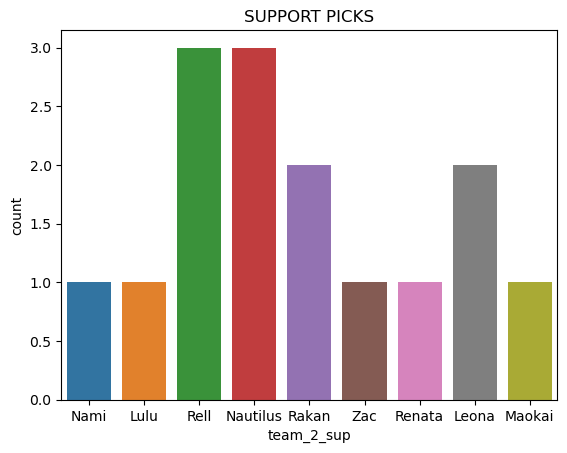

In [49]:
sns.countplot(data=GG_pick, x='team_2_sup')
plt.title('SUPPORT PICKS')
plt.show()

## 3. Wards Dataset

In [50]:
df_wards = pd.read_csv(r"C:\Users\miles\Downloads\Hackathondata\objective.csv")

In [51]:
df_wards

,game_urn,seq_idx,event_date_time,game_time,ward_type,placer_team_urn,placer_team,placer_urn,placer,pos_x,pos_y,placer_team_perid,placer_perid,upsert_at
0,live:lol:riot:map:esportstmnt01-3373466,0,2023-06-14 21:14:35.125+00,79926,yellowTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:8146eacb-7313-3639-ac26-0...,EMENES,9330,5592,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:c39d6f48-788f-4bf4-9f37-34e816b...,2023-06-14 22:04:24.35203+00
1,live:lol:riot:map:esportstmnt01-3373466,1,2023-06-14 21:14:41.603+00,86404,yellowTrinket,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:6d68f827-0469-30af-878b-3...,River,8566,4872,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:654a72de-a5ee-44b9-9aa9-149ddd5...,2023-06-14 22:04:24.35203+00
2,live:lol:riot:map:esportstmnt01-3373466,2,2023-06-14 21:14:47.263+00,92064,yellowTrinket,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:37643ce5-d0ef-31f1-a000-a...,huhi,10637,3012,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:cd2bc07a-142e-4f89-bb89-b48eff2...,2023-06-14 22:04:24.35203+00
3,live:lol:riot:map:esportstmnt01-3373466,3,2023-06-14 21:15:03.016+00,107817,yellowTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,Blaber,6492,4684,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:4021e06c-1d01-4cbe-8a72-990e42b...,2023-06-14 22:04:24.35203+00
4,live:lol:riot:map:esportstmnt01-3373466,4,2023-06-14 21:15:13.961+00,118763,yellowTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:c5b97127-7d85-3d54-ab35-e...,Zven,12256,1318,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:f055bb59-5b23-4ba1-babe-f362412...,2023-06-14 22:04:24.35203+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7749,live:lol:riot:map:esportstmnt03-3194810,295,2023-07-21 23:27:46.932+00,2113994,unknown,live:lol:riot:team:99294153828264740,100,live:lol:riot:player:9dd705e0-cfe6-3eb4-b2a2-5...,Busio,5576,7856,esports:team:19a82dc3-96de-474c-8ed1-ced74b0f08cd,esports:player:b7cc9b65-5821-4fbd-b9ef-d8a4c59...,2023-07-22 00:04:46.958876+00
7750,live:lol:riot:map:esportstmnt03-3194810,296,2023-07-21 23:27:48.947+00,2116005,control,live:lol:riot:team:99294153828264740,100,live:lol:riot:player:9dd705e0-cfe6-3eb4-b2a2-5...,Busio,6254,8096,esports:team:19a82dc3-96de-474c-8ed1-ced74b0f08cd,esports:player:b7cc9b65-5821-4fbd-b9ef-d8a4c59...,2023-07-22 00:04:46.958876+00
7751,live:lol:riot:map:esportstmnt03-3194810,297,2023-07-21 23:27:57.371+00,2124433,sight,live:lol:riot:team:99294153828264740,100,live:lol:riot:player:9dd705e0-cfe6-3eb4-b2a2-5...,Busio,7161,8596,esports:team:19a82dc3-96de-474c-8ed1-ced74b0f08cd,esports:player:b7cc9b65-5821-4fbd-b9ef-d8a4c59...,2023-07-22 00:04:46.958876+00
7752,live:lol:riot:map:esportstmnt03-3194810,298,2023-07-21 23:28:05.369+00,2132431,sight,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:37643ce5-d0ef-31f1-a000-a...,huhi,8472,6444,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:cd2bc07a-142e-4f89-bb89-b48eff2...,2023-07-22 00:04:46.958876+00


In [52]:
# Columns im dropping
columns_3=['seq_idx', 'placer_team_urn', 'placer_urn', 'placer_team_perid', 'placer_perid', 'upsert_at']

In [53]:
df_wards = df_wards.drop(columns_3, axis=1)

In [54]:
df_wards = df_wards.dropna()

In [55]:
# changing to date time
df_wards['event_date_time'] = pd.to_datetime(df_wards['event_date_time'])

In [56]:
df_wards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7728 entries, 0 to 7753
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   game_urn         7728 non-null   object             
 1   event_date_time  7728 non-null   datetime64[ns, UTC]
 2   game_time        7728 non-null   int64              
 3   ward_type        7728 non-null   object             
 4   placer_team      7728 non-null   object             
 5   placer           7728 non-null   object             
 6   pos_x            7728 non-null   int64              
 7   pos_y            7728 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 543.4+ KB


In [57]:
# C9 wards dataframe
C9_wards = df_wards[df_wards['placer_team'] == 'C9']

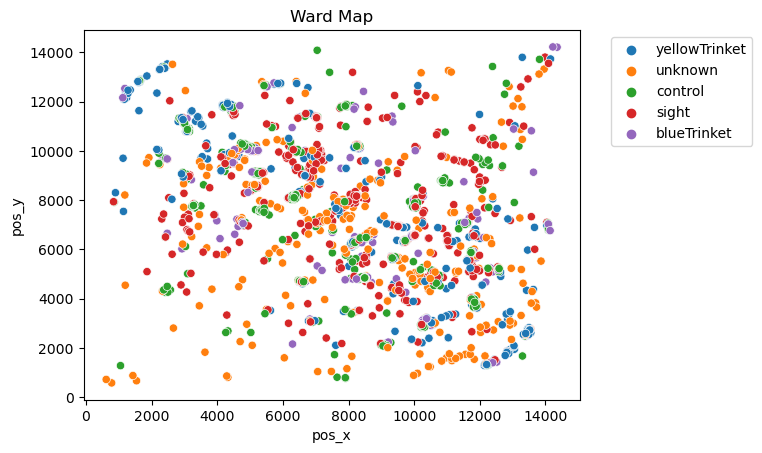

In [58]:
sns.scatterplot(data=C9_wards, x='pos_x', y='pos_y', hue='ward_type')
plt.title('Ward Map')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## 4.Objectives Dataset 

In [59]:
df_obj= pd.read_csv(r"C:\Users\miles\Downloads\Hackathondata\obj.csv")

In [60]:
df_obj

,game_urn,seq_idx,event_date_time,game_time,monster_type,dragon_type,killer_team_urn,killer_team,killer_urn,killer,assistants,pos_x,pos_y,killer_team_perid,killer_perid,upsert_at
0,live:lol:riot:map:esportstmnt01-3373466,0,2023-06-14 21:14:52.074+00,96867,raptor,NaN,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:6d68f827-0469-30af-878b-3...,River,NaN,6963,4753,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:654a72de-a5ee-44b9-9aa9-149ddd5...,2023-06-14 22:04:25.983167+00
1,live:lol:riot:map:esportstmnt01-3373466,1,2023-06-14 21:15:31.019+00,135819,wolf,NaN,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,Blaber,NaN,3268,6923,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:4021e06c-1d01-4cbe-8a72-990e42b...,2023-06-14 22:04:25.983167+00
2,live:lol:riot:map:esportstmnt01-3373466,2,2023-06-14 21:15:55.27+00,160069,raptor,NaN,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:6d68f827-0469-30af-878b-3...,River,NaN,7671,9942,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:654a72de-a5ee-44b9-9aa9-149ddd5...,2023-06-14 22:04:25.983167+00
3,live:lol:riot:map:esportstmnt01-3373466,3,2023-06-14 21:15:58.334+00,163135,blueCamp,NaN,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,Blaber,NaN,2694,8422,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:4021e06c-1d01-4cbe-8a72-990e42b...,2023-06-14 22:04:25.983167+00
4,live:lol:riot:map:esportstmnt01-3373466,4,2023-06-14 21:16:12.04+00,176837,gromp,NaN,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,Blaber,NaN,2951,7926,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:4021e06c-1d01-4cbe-8a72-990e42b...,2023-06-14 22:04:25.983167+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3086,live:lol:riot:map:esportstmnt03-3194810,114,2023-07-21 23:27:08.164+00,2075226,blueCamp,NaN,live:lol:riot:team:99294153828264740,100,live:lol:riot:player:eb392fd2-f2b2-36b5-9747-d...,Ssumday,NaN,11304,6340,esports:team:19a82dc3-96de-474c-8ed1-ced74b0f08cd,esports:player:1645776d-070d-4d9a-b8fd-c443821...,2023-07-22 00:04:48.456971+00
3087,live:lol:riot:map:esportstmnt03-3194810,115,2023-07-21 23:27:10.093+00,2077156,wolf,NaN,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:6d68f827-0469-30af-878b-3...,River,NaN,11194,8618,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:654a72de-a5ee-44b9-9aa9-149ddd5...,2023-07-22 00:04:48.456971+00
3088,live:lol:riot:map:esportstmnt03-3194810,116,2023-07-21 23:27:11.898+00,2078962,blueCamp,NaN,live:lol:riot:team:99294153828264740,100,live:lol:riot:player:80bcc494-1ec9-3ca6-ad1a-6...,Quid,NaN,3157,7746,esports:team:19a82dc3-96de-474c-8ed1-ced74b0f08cd,esports:player:280ecec6-9639-4ba4-b262-e53ad13...,2023-07-22 00:04:48.456971+00
3089,live:lol:riot:map:esportstmnt03-3194810,117,2023-07-21 23:27:14.487+00,2081527,wolf,NaN,live:lol:riot:team:99294153828264740,100,live:lol:riot:player:6b375f43-5966-3150-bad0-5...,Closer,NaN,3553,6686,esports:team:19a82dc3-96de-474c-8ed1-ced74b0f08cd,esports:player:d00233b2-4c3d-4349-9bec-e6e6de1...,2023-07-22 00:04:48.456971+00


In [61]:
# columns im dropping
columns_4 = ['killer_team_urn', 'killer_urn', 'killer_team_perid', 'killer_perid', 'upsert_at']

In [62]:
df_obj = df_obj.drop(columns_4, axis=1)

In [63]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_urn         3091 non-null   object
 1   seq_idx          3091 non-null   int64 
 2   event_date_time  3091 non-null   object
 3   game_time        3091 non-null   int64 
 4   monster_type     3091 non-null   object
 5   dragon_type      137 non-null    object
 6   killer_team      3091 non-null   object
 7   killer           3091 non-null   object
 8   assistants       227 non-null    object
 9   pos_x            3091 non-null   int64 
 10  pos_y            3091 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 265.8+ KB


In [64]:
#changing my milisecond to minutes 
df_obj['game_time'] = df_obj['game_time'] / 60000

In [65]:
BL_path = df_obj[df_obj['killer'] == 'Blaber'].reset_index()

# i wanted to try a creat a visualization of where blaber starts pathing so this is my final attempt at that. 

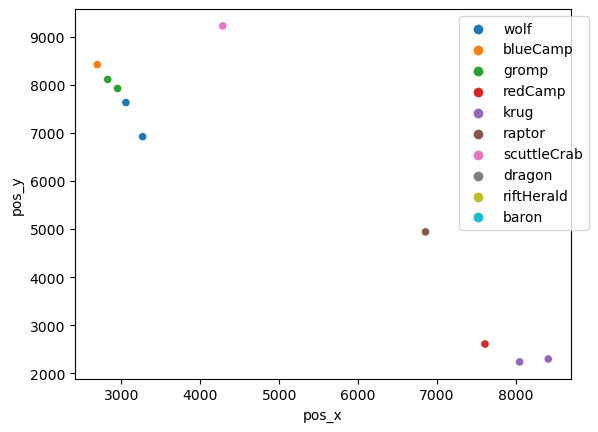

In [66]:
# scatterplot of Blaber first 10 events in a game
sns.scatterplot(data=BL_path, x=BL_path['pos_x'][:10], y=BL_path['pos_y'][:10], hue='monster_type')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# He likely starts blue into red considering first 10 minutes of game he's able to get gromp and wolves twice

In [67]:
#C9 objective dataframe
C9_obj = df_obj[df_obj['killer_team'] == 'C9']

In [68]:
# C9 Baron dataframe
C9_baron = C9_obj[C9_obj['monster_type'] == 'baron']

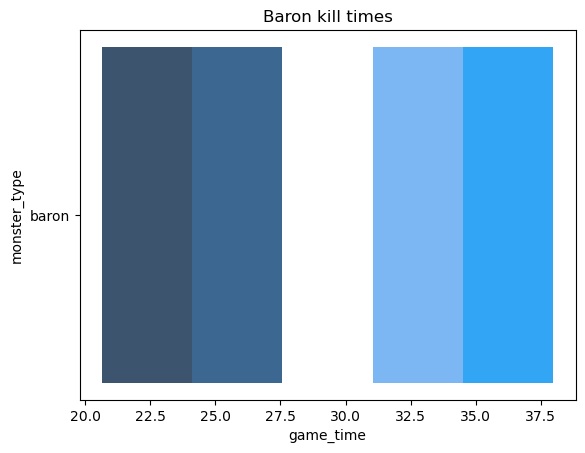

In [69]:
sns.histplot(data=C9_baron, x='game_time', y='monster_type')
plt.title('Baron kill times')
plt.show()

In [70]:
#C9 Dragon dataframe
C9_drag = C9_obj[C9_obj['monster_type'] == 'dragon']

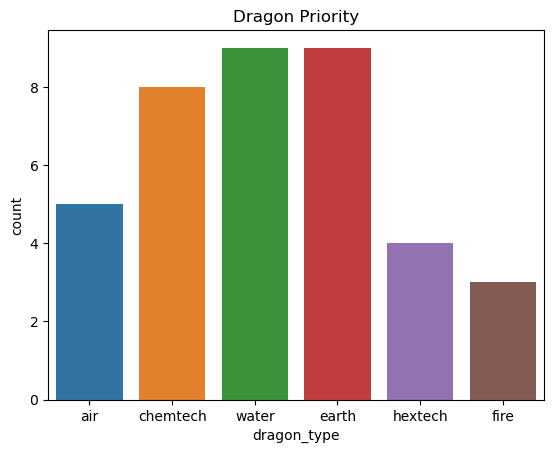

In [71]:
sns.countplot(data=C9_drag, x='dragon_type')
plt.title('Dragon Priority')
plt.show()

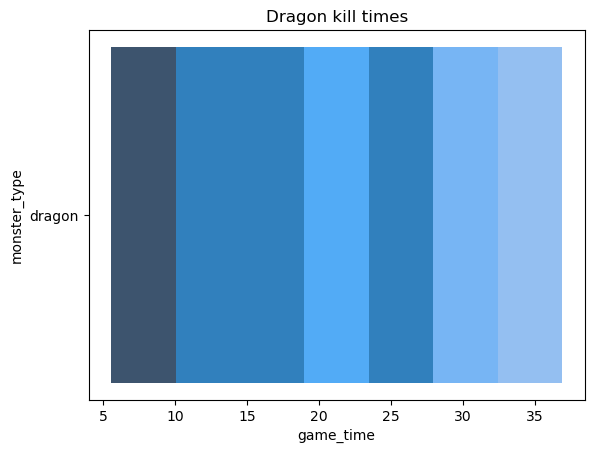

In [72]:
sns.histplot(data=C9_drag, x='game_time', y='monster_type')
plt.title('Dragon kill times')
plt.show()

# 5. Snapshot dataset

In [73]:
df_snap = pd.read_csv(r"C:\Users\miles\Downloads\Hackathondata\snapshot_player_stats (1).csv")

C:\Users\miles\AppData\Local\Temp\ipykernel_22212\3651192734.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_snap = pd.read_csv(r"C:\Users\miles\Downloads\Hackathondata\snapshot_player_stats (1).csv")


In [74]:
df_snap

,game_urn,player_urn,seq_idx,event_date_time,game_time,winning_team,player,team_urn,team,champion,level,alive,health,current_gold,total_gold,gold_per_second,pos_x,pos_y,minions_killed,neutral_minions_killed,neutral_minions_killed_your_jungle,neutral_minions_killed_enemy_jungle,champs_killed,deaths,assists,wards_placed,wards_killed,vision_score,total_damage_dealt_champions,total_damage_taken,item_1_id,item_2_id,item_3_id,item_4_id,item_5_id,item_6_id,item_7_id
0,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:051c9431-16d0-3872-98c4-c...,16,2023-06-14 21:13:15.338+00,138,NaN,Fudge,live:lol:riot:team:98767991877340524,C9,KSante,1,True,610,500,500,0,554,581,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,16,2023-06-14 21:13:15.338+00,138,NaN,Blaber,live:lol:riot:team:98767991877340524,C9,Kindred,1,True,610,500,500,0,593,464,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:8146eacb-7313-3639-ac26-0...,16,2023-06-14 21:13:15.338+00,138,NaN,EMENES,live:lol:riot:team:98767991877340524,C9,Gragas,1,True,670,500,500,0,557,345,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:571444c9-662e-38fc-b857-4...,16,2023-06-14 21:13:15.338+00,138,NaN,Berserker,live:lol:riot:team:98767991877340524,C9,Zeri,1,True,630,500,500,0,458,271,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:c5b97127-7d85-3d54-ab35-e...,16,2023-06-14 21:13:15.338+00,138,NaN,Zven,live:lol:riot:team:98767991877340524,C9,Milio,1,True,560,500,500,0,335,269,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177035,live:lol:riot:map:esportstmnt03-3194810,live:lol:riot:player:5b83854f-e384-3428-ba34-6...,7654,2023-07-21 23:29:09.063+00,2196119,GG,Licorice,live:lol:riot:team:99294153824386385,GG,Jax,18,True,1212,1922,13616,0,1930,1836,253.0,8.000000,8.000000,0.0,2,4,8,17,4,41.477234,21719.175781,32388.462891,6632.0,3071.0,3111.0,3157.0,1028.0,NaN,NaN
2177036,live:lol:riot:map:esportstmnt03-3194810,live:lol:riot:player:6d68f827-0469-30af-878b-3...,7654,2023-07-21 23:29:09.063+00,2196119,GG,River,live:lol:riot:team:99294153824386385,GG,Vi,15,False,0,358,11223,0,8098,4970,25.0,167.199982,119.700035,8.0,2,4,8,13,25,65.881424,10300.216797,33715.464844,3071.0,3111.0,6667.0,8001.0,1029.0,2055.0,NaN
2177037,live:lol:riot:map:esportstmnt03-3194810,live:lol:riot:player:f71f63d9-8116-3f70-8f1d-4...,7654,2023-07-21 23:29:09.063+00,2196119,GG,Gori,live:lol:riot:team:99294153824386385,GG,Ahri,18,True,2066,1278,15617,0,2075,2294,317.0,0.000000,0.000000,0.0,5,2,8,27,17,58.479546,28048.755859,21744.378906,3111.0,6656.0,3089.0,1082.0,4645.0,3102.0,NaN
2177038,live:lol:riot:map:esportstmnt03-3194810,live:lol:riot:player:da579c1d-57b1-3e2e-824c-f...,7654,2023-07-21 23:29:09.063+00,2196119,GG,Stixxay,live:lol:riot:team:99294153824386385,GG,Xayah,18,True,1540,3039,18643,0,2347,1748,364.0,33.199997,27.699997,0.0,5,2,6,14,13,49.682552,30935.353516,19261.648438,3006.0,6672.0,6675.0,3036.0,3072.0,1018.0,NaN


In [75]:
df_snap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177040 entries, 0 to 2177039
Data columns (total 37 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   game_urn                             object 
 1   player_urn                           object 
 2   seq_idx                              int64  
 3   event_date_time                      object 
 4   game_time                            int64  
 5   winning_team                         object 
 6   player                               object 
 7   team_urn                             object 
 8   team                                 object 
 9   champion                             object 
 10  level                                int64  
 11  alive                                bool   
 12  health                               int64  
 13  current_gold                         int64  
 14  total_gold                           int64  
 15  gold_per_second                 

# Player individual snapshots

# Berserker
 # ---------------------------------------------------------------------------------------

In [76]:
B_snap = df_snap[df_snap['player'] == 'Berserker']

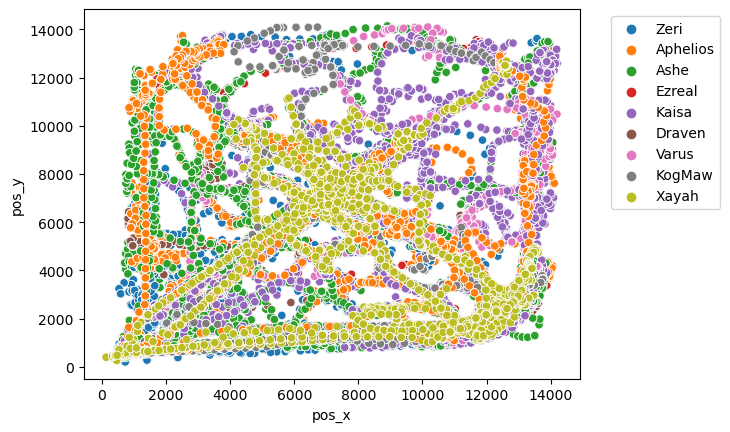

In [77]:
sns.scatterplot(data=B_snap, x='pos_x', y='pos_y', hue='champion')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

<Axes: xlabel='champion', ylabel='total_damage_dealt_champions'>

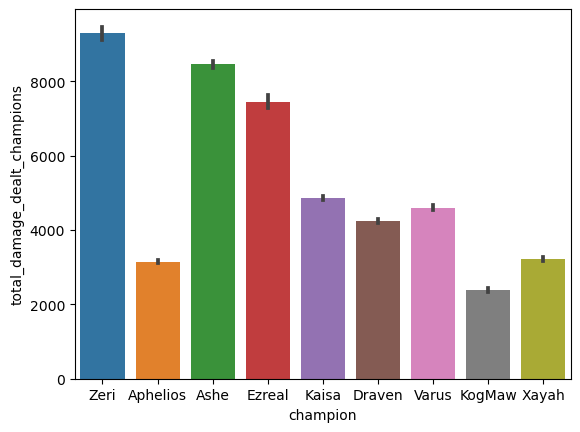

In [78]:
sns.barplot(data=B_snap, x='champion', y='total_damage_dealt_champions')

<Axes: xlabel='champion', ylabel='champs_killed'>

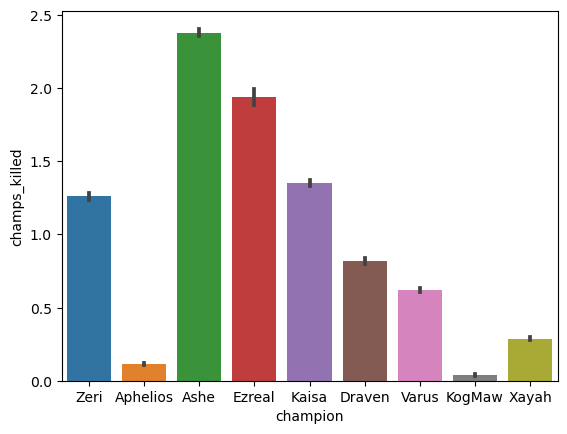

In [79]:
sns.barplot(data=B_snap, x='champion', y='champs_killed')

<Axes: xlabel='champion', ylabel='deaths'>

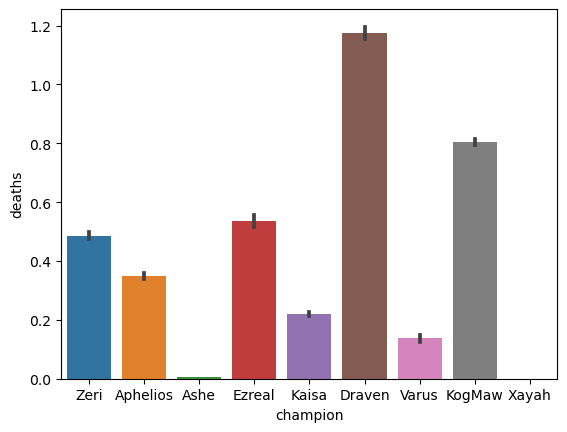

In [80]:
sns.barplot(data=B_snap, x='champion', y='deaths')

<Axes: xlabel='alive', ylabel='count'>

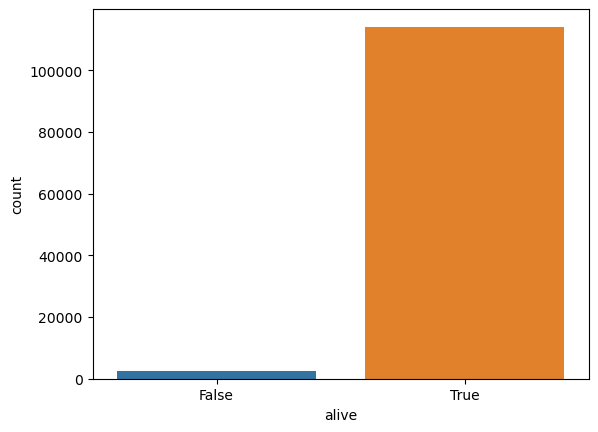

In [81]:
sns.countplot(data=B_snap, x='alive')

# Zven
# ------------------------------------------------------------------

In [82]:
Z_snap = df_snap[df_snap['player'] == 'Zven']

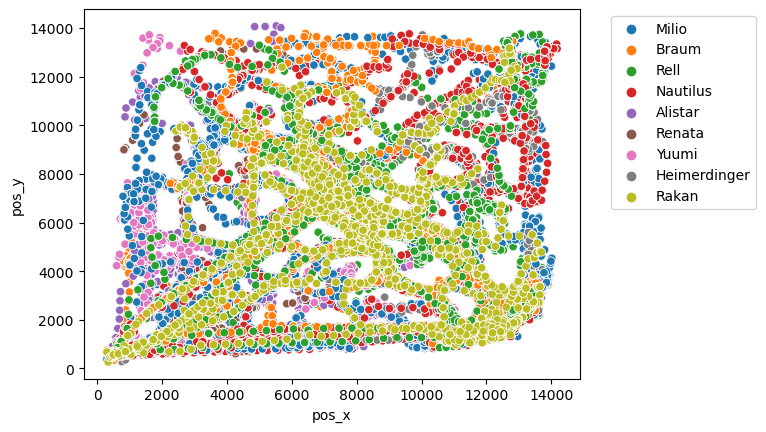

In [83]:
sns.scatterplot(data=Z_snap, x='pos_x', y='pos_y', hue='champion')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

<Axes: xlabel='alive', ylabel='count'>

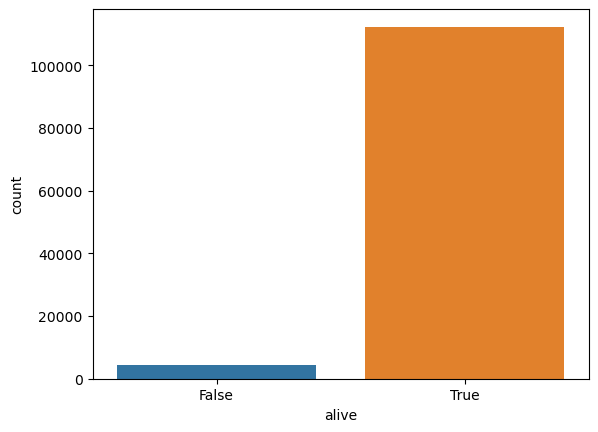

In [84]:
sns.countplot(data=Z_snap, x='alive')

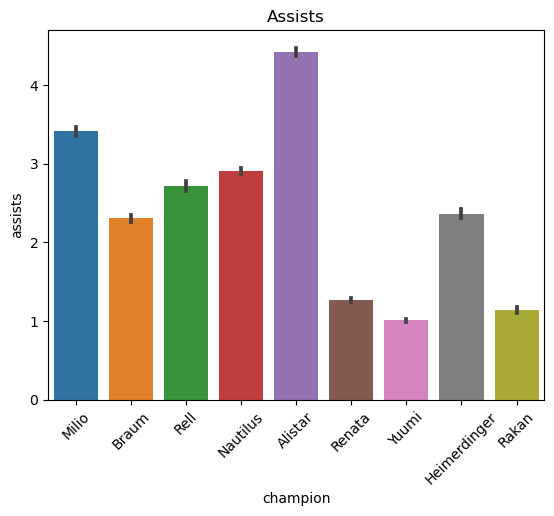

In [108]:
sns.barplot(data=Z_snap, x='champion', y='assists')
plt.title('Assists')
plt.xticks(rotation=45)
plt.show()

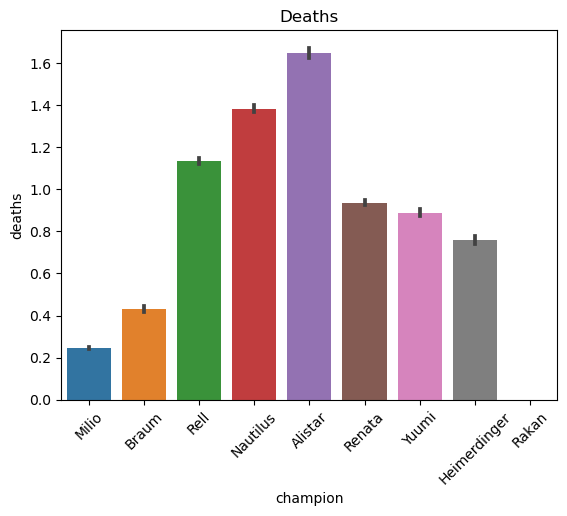

In [109]:
sns.barplot(data=Z_snap, x='champion', y='deaths')
plt.title('Deaths')
plt.xticks(rotation=45)
plt.show()

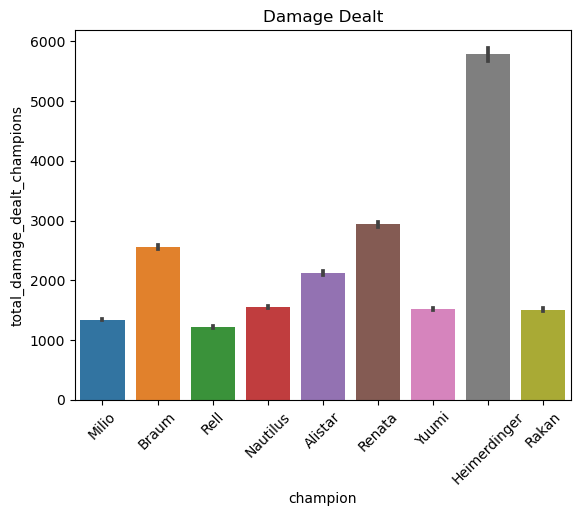

In [110]:
sns.barplot(data=Z_snap, x='champion', y='total_damage_dealt_champions')
plt.title('Damage Dealt')
plt.xticks(rotation=45)
plt.show()

# Emenes
# ----------------------------------------------------------------------

In [88]:
E_snap = df_snap[df_snap['player'] == 'EMENES']

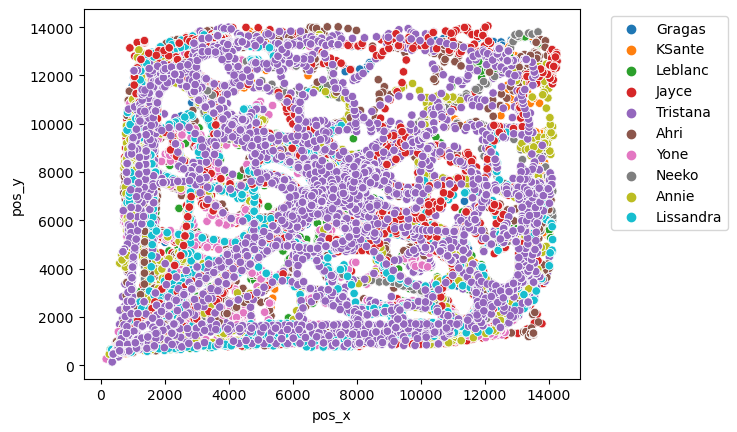

In [90]:
sns.scatterplot(data=E_snap, x='pos_x', y='pos_y', hue='champion')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

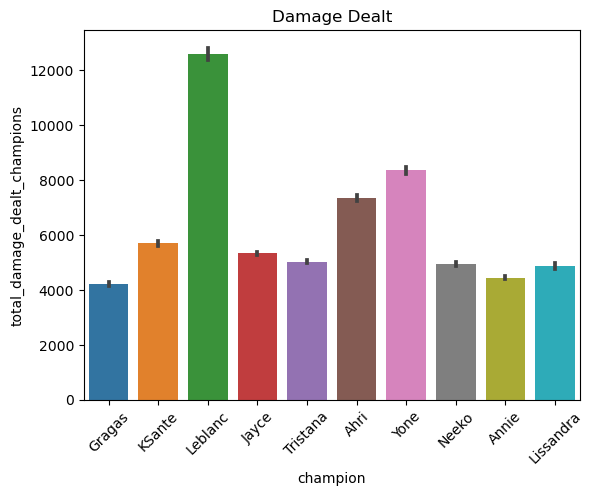

In [111]:
sns.barplot(data=E_snap, x='champion', y='total_damage_dealt_champions')
plt.title('Damage Dealt')
plt.xticks(rotation=45)
plt.show()

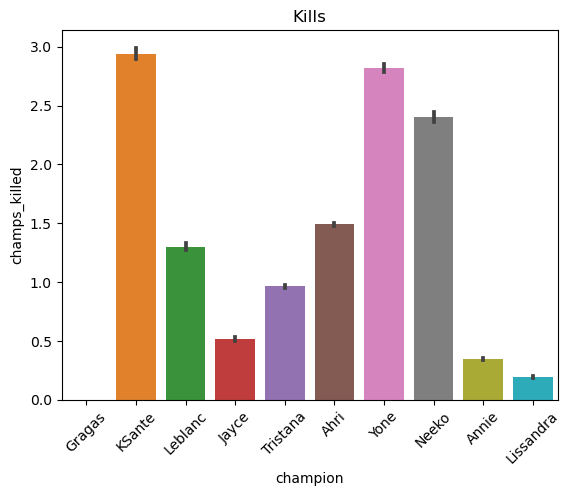

In [112]:
sns.barplot(data=E_snap, x='champion', y='champs_killed')
plt.title('Kills')
plt.xticks(rotation=45)
plt.show()

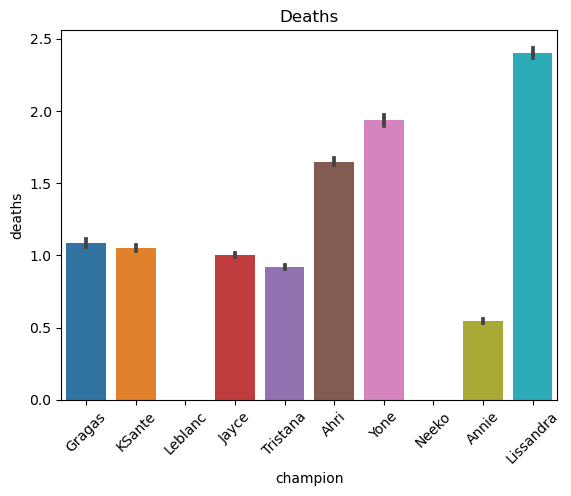

In [113]:
sns.barplot(data=E_snap, x='champion', y='deaths')
plt.title('Deaths')
plt.xticks(rotation=45)
plt.show()

# Blaber
# ---------------------------------------------------------------------

In [91]:
BL_snap = df_snap[df_snap['player'] == 'Blaber']

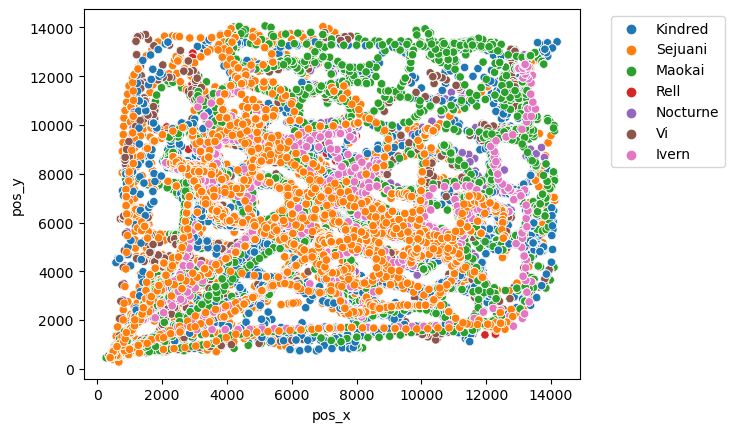

In [92]:
sns.scatterplot(data=BL_snap, x='pos_x', y='pos_y', hue='champion')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

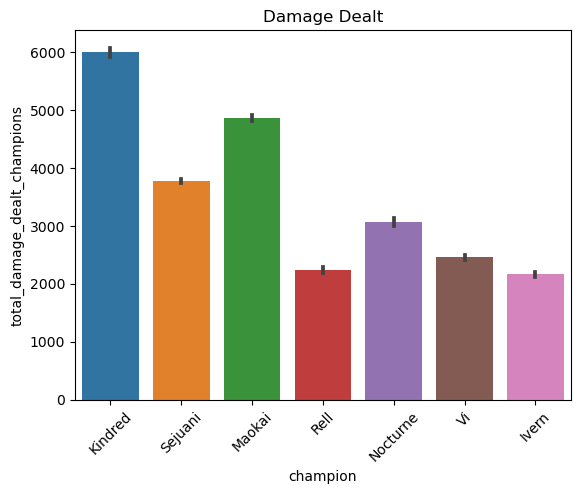

In [114]:
sns.barplot(data=BL_snap, x='champion', y='total_damage_dealt_champions')
plt.title('Damage Dealt')
plt.xticks(rotation=45)
plt.show()

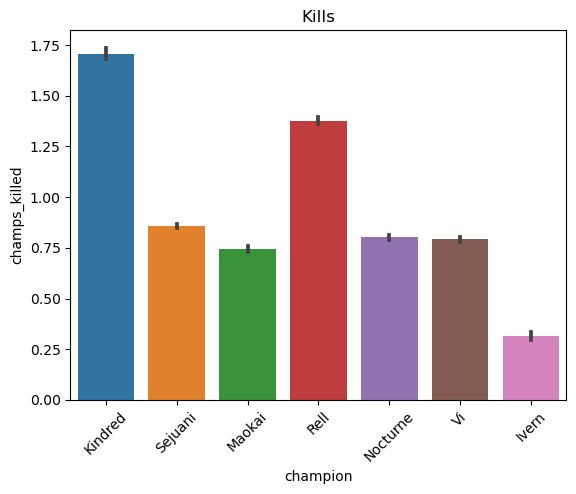

In [115]:
sns.barplot(data=BL_snap, x='champion', y='champs_killed')
plt.title('Kills')
plt.xticks(rotation=45)
plt.show()

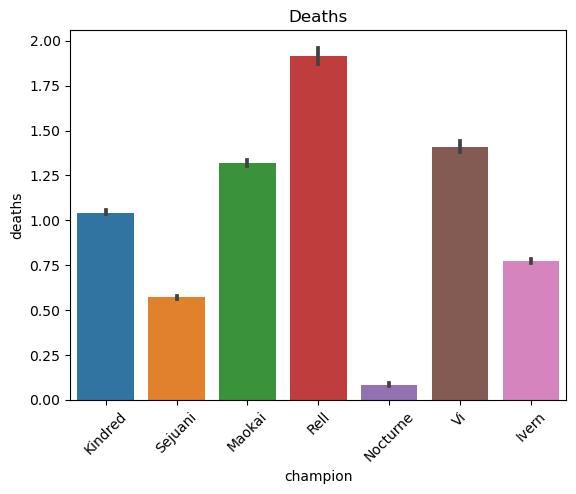

In [116]:
sns.barplot(data=BL_snap, x='champion', y='deaths')
plt.title('Deaths')
plt.xticks(rotation=45)
plt.show()

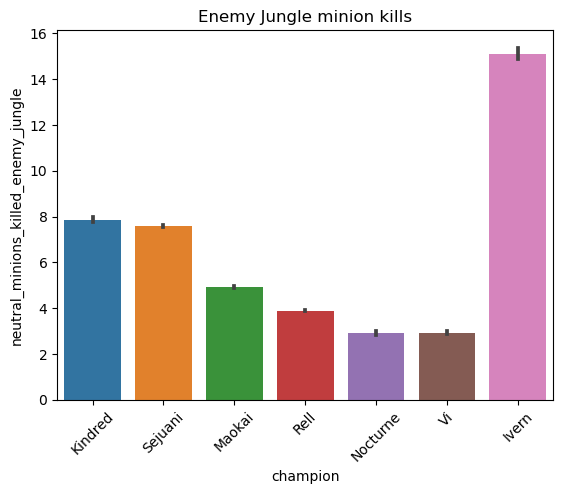

In [117]:
sns.barplot(data=BL_snap, x='champion', y='neutral_minions_killed_enemy_jungle')
plt.title('Enemy Jungle minion kills')
plt.xticks(rotation=45)
plt.show()

# Fudge
# ----------------------------------------------------------------------------

In [93]:
F_snap = df_snap[df_snap['player'] == 'Fudge']

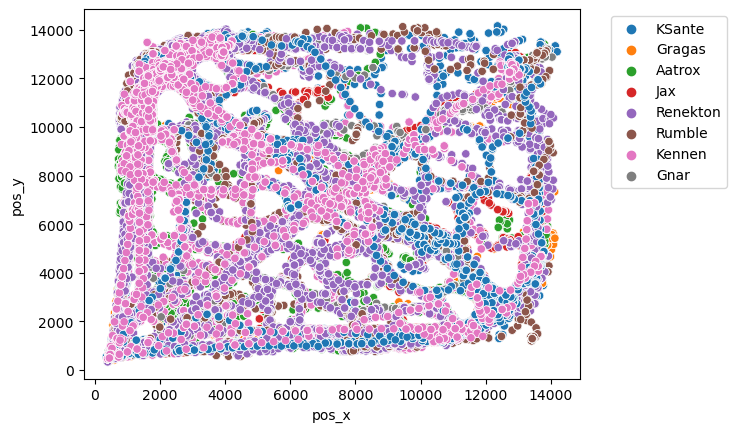

In [94]:
sns.scatterplot(data=F_snap, x='pos_x', y='pos_y', hue='champion')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

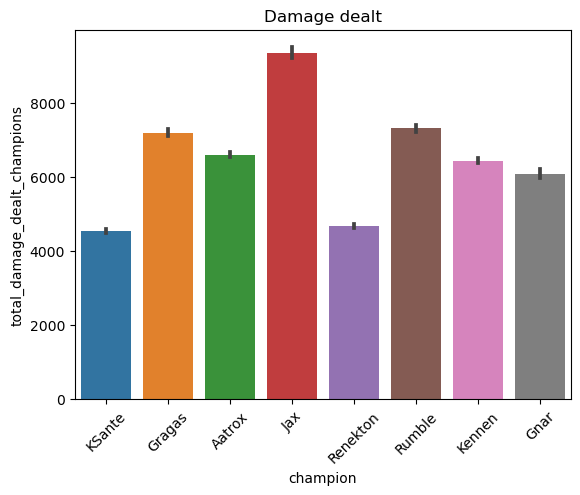

In [118]:
sns.barplot(data=F_snap, x='champion', y='total_damage_dealt_champions')
plt.title('Damage dealt')
plt.xticks(rotation=45)
plt.show()

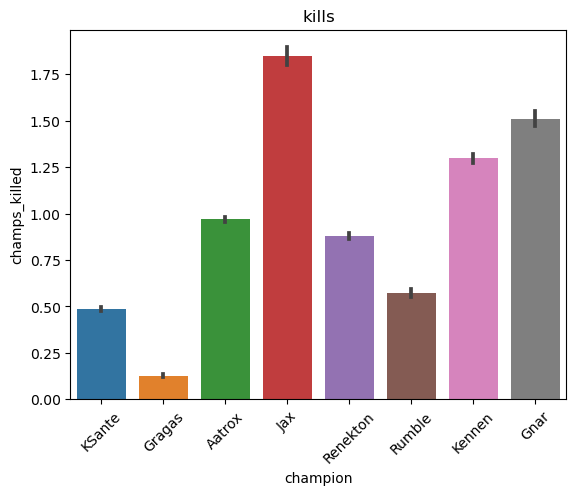

In [119]:
sns.barplot(data=F_snap, x='champion', y='champs_killed')
plt.title('kills')
plt.xticks(rotation=45)
plt.show()

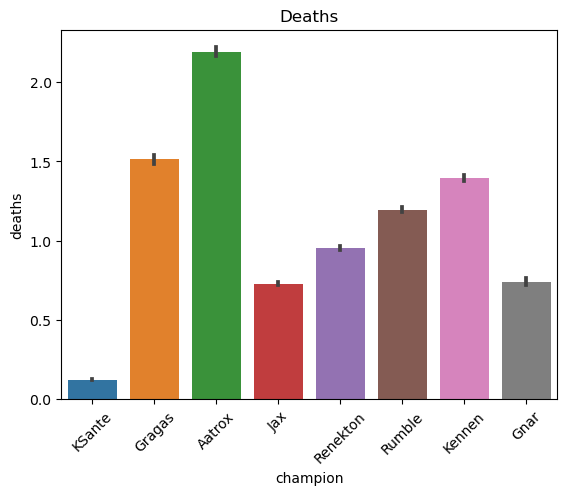

In [120]:
sns.barplot(data=F_snap, x='champion', y='deaths')
plt.title('Deaths')
plt.xticks(rotation=45)
plt.show()